In [7]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\jianbai\Desktop\protfolio\data.csv'
stock_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
stock_data.head()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Data preprocessing
# Convert 'Date' to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')

# Convert 'Close/Last', 'Open', 'High', 'Low' to numeric
price_columns = ['Close/Last', 'Open', 'High', 'Low']
stock_data[price_columns] = stock_data[price_columns].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values
missing_values = stock_data.isnull().sum()

# Summary of the data
data_summary = stock_data.describe()

missing_values, data_summary

(Company          0
 Date          9930
 Close/Last       0
 Volume           0
 Open             0
 High             0
 Low              0
 dtype: int64,
                                 Date    Close/Last        Volume  \
 count                          15230  25160.000000  2.516000e+04   
 mean   2018-07-13 04:03:56.375574528    102.455878  5.131764e+07   
 min              2013-07-18 00:00:00      1.620000  1.143952e+06   
 25%              2016-01-14 00:00:00     36.567500  1.200394e+07   
 50%              2018-07-18 00:00:00     65.680000  2.672083e+07   
 75%              2021-01-13 00:00:00    134.235025  6.857269e+07   
 max              2023-07-17 00:00:00    691.690000  1.065209e+09   
 std                              NaN    101.991372  6.399143e+07   
 
                Open          High           Low  
 count  25160.000000  25160.000000  25160.000000  
 mean     102.430761    103.829305    101.006112  
 min        1.620000      1.690000      1.610000  
 25%       36.5075

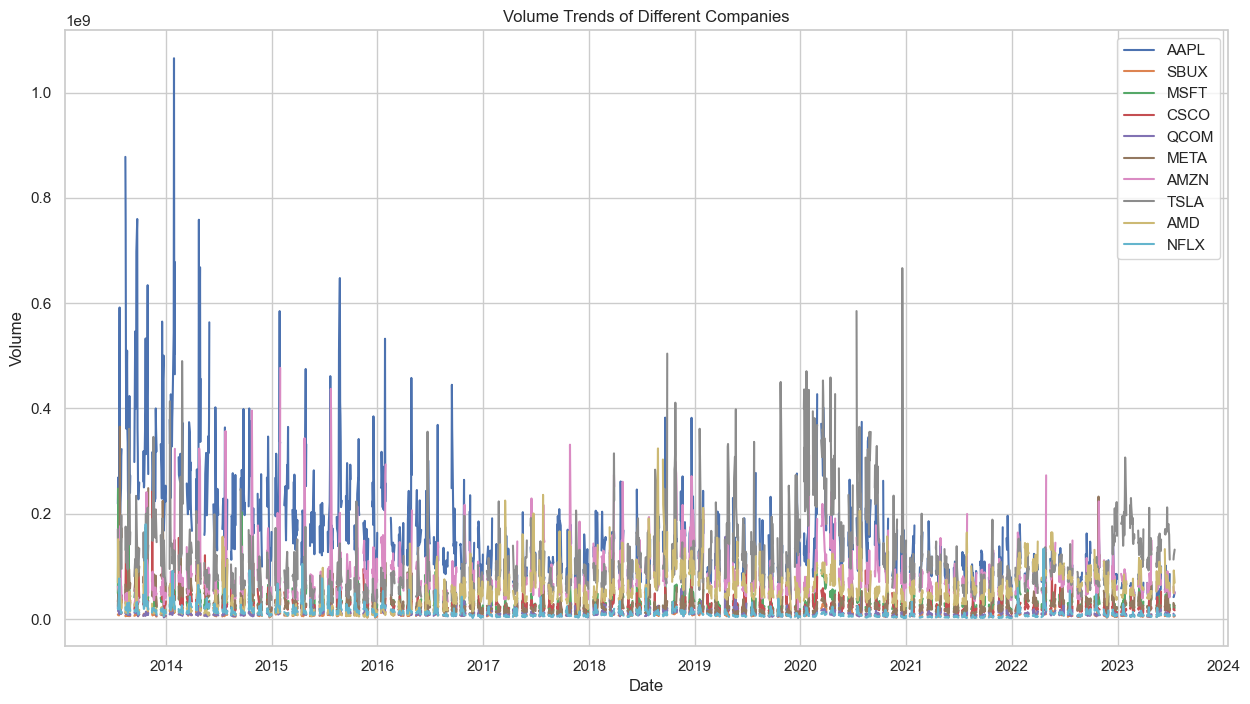

In [4]:
# Plotting the volume trends for each company
plt.figure(figsize=(15, 8))
for company in stock_data['Company'].unique():
    company_data = stock_data[stock_data['Company'] == company]
    plt.plot(company_data['Date'], company_data['Volume'], label=company)

plt.title('Volume Trends of Different Companies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


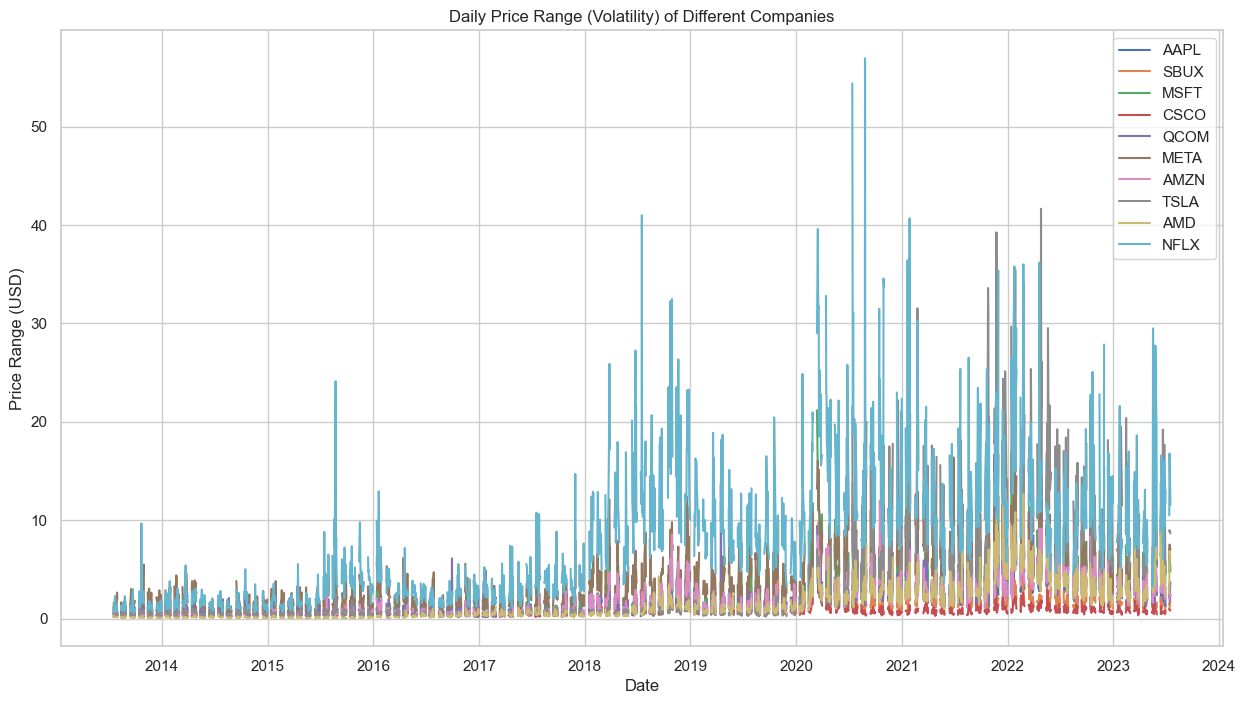

In [5]:
# Calculating the daily price range (High - Low) for each company
stock_data['Price_Range'] = stock_data['High'] - stock_data['Low']

# Plotting the price volatility for each company
plt.figure(figsize=(15, 8))
for company in stock_data['Company'].unique():
    company_data = stock_data[stock_data['Company'] == company]
    plt.plot(company_data['Date'], company_data['Price_Range'], label=company)

plt.title('Daily Price Range (Volatility) of Different Companies')
plt.xlabel('Date')
plt.ylabel('Price Range (USD)')
plt.legend()
plt.show()


C:\Users\jianbai\AppData\Local\Temp\ipykernel_26096\2533997416.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


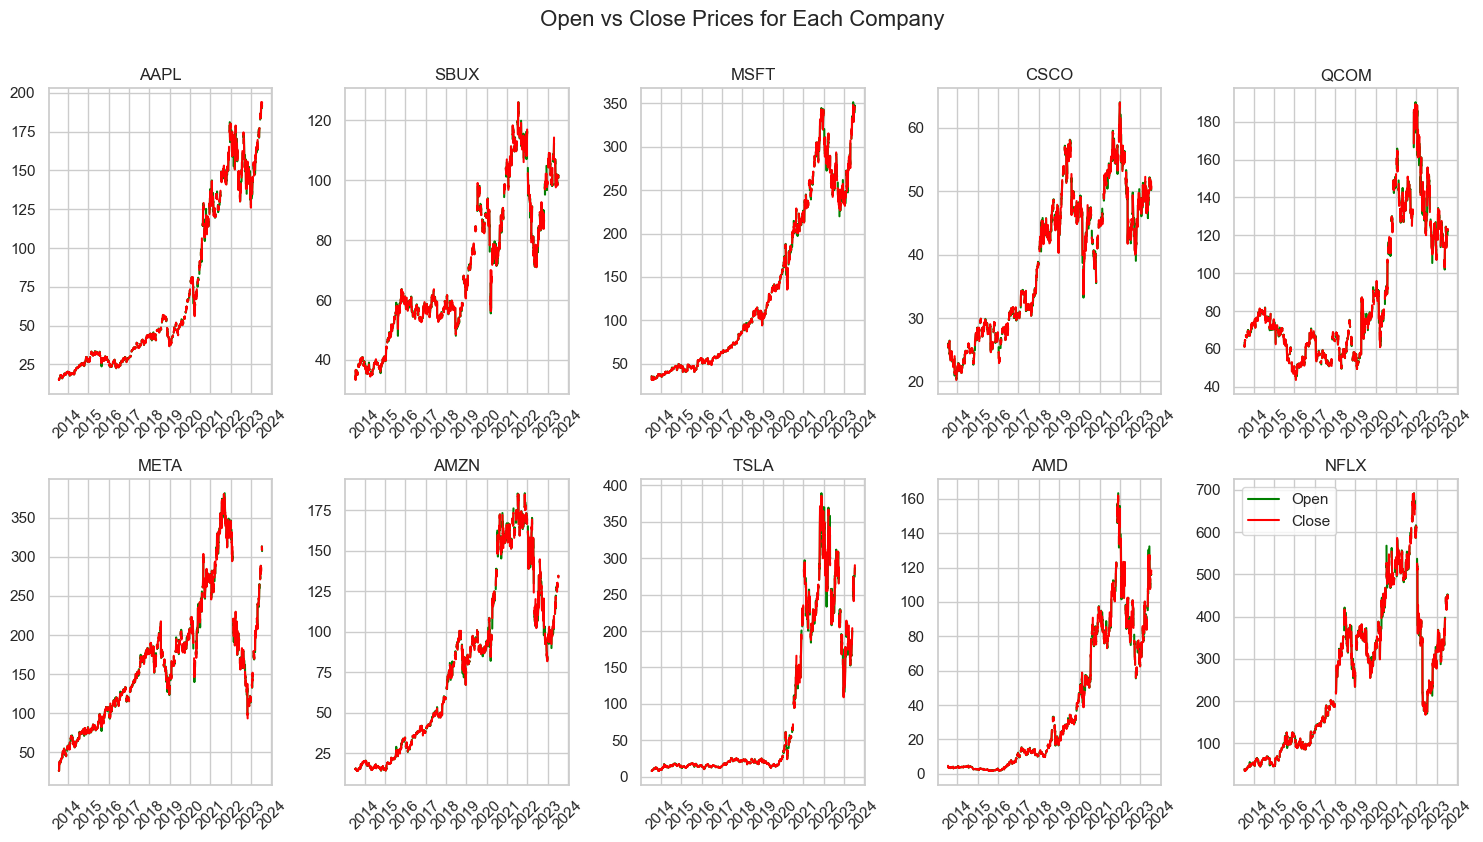

In [6]:
# Plotting the open and close prices for each company
plt.figure(figsize=(15, 8))

for company in stock_data['Company'].unique():
    company_data = stock_data[stock_data['Company'] == company]
    
    # Creating a subplot for each company
    plt.subplot(2, 5, list(stock_data['Company'].unique()).index(company) + 1)
    plt.plot(company_data['Date'], company_data['Open'], label='Open', color='green')
    plt.plot(company_data['Date'], company_data['Close/Last'], label='Close', color='red')
    plt.title(company)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Open vs Close Prices for Each Company', fontsize=16, y=1.05)
plt.legend()
plt.show()
